# ACCURACY SCORE

In [6]:
# Funtion to calculate accuracy from actual y and predicted y values
def accuracy(y_true,y_pred):
    """
    Funtion to calculate accuracy
    :param y_true : list of true valyes
    :param y_pred : list of predicted values
    :return: accuracy_score
    """
    correct_counter = 0
    for yt , yp in zip(y_true,y_pred):
        if yt==yp:
            correct_counter+=1
    return correct_counter/len(y_true)

In [42]:
l1 = [0,1,0,1,1,1,0,0,0,1,0,1,0,1,1,1,0,0,1]
l2 = [1,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,0,1,1]

In [43]:
accuracy(l1,l2)

0.5263157894736842

In [44]:
from sklearn import metrics
metrics.accuracy_score(l1,l2)


0.5263157894736842

In [45]:
## IF A MODEL CORRECTLY PREDICTS POSITIVE CLASS IT IS A TRUE POSITIVE
## AND IF A MODEL ACCURATELY PREDICTS A NEGATIVE CLASS THEN IT IS A TRUE NEGATIVE
## SIMILARLY IF A MODEL FALSELY PREDICTS A NEGATIVE CLASS AS POSITIVE THEN IT IS A FALSE POSITIVE
## SIMILARLY IF MODEL FALSELY PREDICTS A POSITIVE CLASS AS NEGATIVE THEN IT IS FLASE NEGATIVE  

# TP , TN , FP , FN

In [46]:
def true_positive(y_true , y_pred):
    tp=0
    for yt,yp in zip(y_true,y_pred):
        if yt==1 and yp==1:
            tp+=1
    return tp

def true_negative(y_true , y_pred):
    tn=0
    for yt,yp in zip(y_true,y_pred):
        if yt==0 and yp==0:
            tn+=1
    return tn

def false_negative(y_true,y_pred):
    fn=0
    for yt,yp in zip(y_true,y_pred):
        if yt==1 and yp==0 :
            fn+=1
    return fn

def false_positive(y_true,y_pred):
    fp = 0
    for yt,yp in zip(y_true,y_pred):
        if yt==0 and yp==1:
            fp+=1
    return fp

In [47]:
print(true_positive(l1,l2))
print(true_negative(l1,l2))
print(false_negative(l1,l2))
print(false_positive(l1,l2))


6
4
4
5


## ACCURACY USING CONFUSION MATRIX
###  accuracy_score = (tp+tn)/(tp+tn+fp+fn)

In [48]:
def accuracy_v2(y_true,y_pred):
    tp = true_positive(y_true , y_pred)
    tn = true_negative(y_true,y_pred)
    fp = false_positive(y_true,y_pred)
    fn = false_negative(y_true,y_pred)
    accuracy_score = (tp+tn)/(tp+tn+fp+fn)
    return accuracy_score

In [49]:
print(f'Accuracy from accuracy_v2 function:{accuracy_v2(l1,l2)}')
print(f'Accuracy from aklearn metrics:{metrics.accuracy_score(l1,l2)}')


Accuracy from accuracy_v2 function:0.5263157894736842
Accuracy from aklearn metrics:0.5263157894736842


# PRECISION

In [50]:
def precision(y_true,y_pred):
    tp = true_positive(y_true,y_pred)
    fp = false_positive(y_true,y_pred)
    precision = tp/(tp+fp)
    return precision

In [51]:
precision(l1,l2)

0.5454545454545454

### Precision of 0.54 basically states that out models is correct 54% of the times when it is trying to identify positive samples.

# RECALL

In [37]:
def recall(y_true,y_pred):
    tp = true_positive(y_true,y_pred)
    fn = false_negative(y_true,y_pred)
    recall = tp/(tp+fn)
    return recall

In [52]:
recall(l1,l2)

0.6

### Recall of 0.6 basically means that out model identified 60% of the positive samples correctly.

In [76]:
# import random

# list_two = [round(random.uniform(0, 0.9), 5) for _ in range(20)]
# print(list_two)


In [75]:
# thresholds = [round(random.uniform(0.1, 0.9), 2) for _ in range(20)]
# print(thresholds)

# PRECISION - RECALL CURVE

In [59]:
from sklearn.metrics import precision_score, recall_score

y_true = [1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0]
y_pred = [0.81337, 0.67104, 0.4827, 0.04853, 0.06561, 0.73116, 0.28626, 0.31116, 0.00829, 0.61676, 0.80356, 0.60794, 0.89271, 0.05282, 0.64589, 0.51317, 0.50752, 0.67383, 0.76289, 0.02735]

precision = []
recall = []

thresholds = [0.69, 0.33, 0.43, 0.16, 0.79, 0.62, 0.68, 0.43, 0.51, 0.7, 0.56, 0.39, 0.46, 0.74, 0.74, 0.42, 0.15, 0.36, 0.84, 0.9]

for i in thresholds:
    temp_prediction = [1 if x >= i else 0 for x in y_pred]
    p = precision_score(y_true, temp_prediction)
    r = recall_score(y_true, temp_prediction)
    precision.append(p)
    recall.append(r)

print("Precision:", precision)
print("Recall:", recall)


Precision: [0.6, 0.7692307692307693, 0.7692307692307693, 0.7333333333333333, 0.3333333333333333, 0.75, 0.6, 0.7692307692307693, 0.8181818181818182, 0.6, 0.8, 0.7692307692307693, 0.7692307692307693, 0.5, 0.5, 0.7692307692307693, 0.7333333333333333, 0.7692307692307693, 0.0, 0.0]
Recall: [0.2727272727272727, 0.9090909090909091, 0.9090909090909091, 1.0, 0.09090909090909091, 0.5454545454545454, 0.2727272727272727, 0.9090909090909091, 0.8181818181818182, 0.2727272727272727, 0.7272727272727273, 0.9090909090909091, 0.9090909090909091, 0.18181818181818182, 0.18181818181818182, 0.9090909090909091, 1.0, 0.9090909090909091, 0.0, 0.0]


/Users/shubham/MachineLearning/AMLP/ml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Precision')

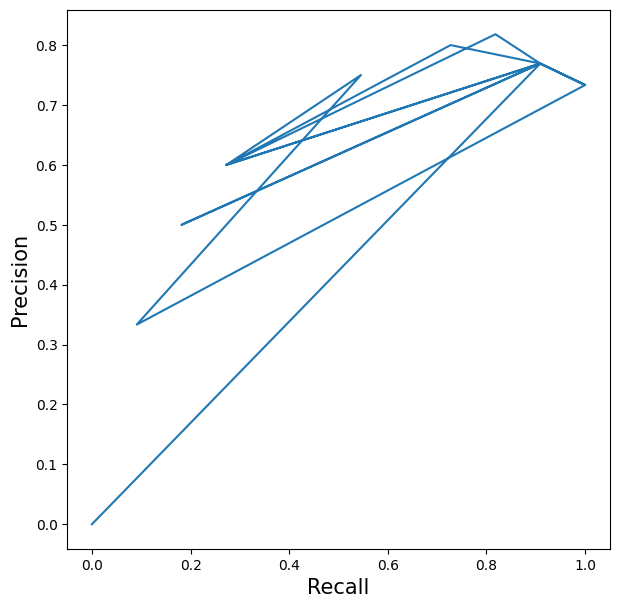

In [63]:
plt.figure(figsize=(7,7))
plt.plot(recall , precision)
plt.xlabel('Recall',fontsize=15)
plt.ylabel('Precision',fontsize=15)

#### If the threshold is too high then we get SMALLER NUMBER OF TRUE POSITIVES and HIGH NUMBER OF FALSE POSITIVES.
#### This DECREASES RECALL but PRECISION WILL BE HIGH.
#### And if the threshold is too low then false positive will increase alot and precision will be less.

# F1 SCORE (Harmonic mean of P and R)

##### F1 score is a metric that combines noth precision and recall using simple weighted average or (HARMONIC MEAN of p and r)
##### F1 = 2 * PRECISION * RECALL / (PRECISION + RECALL)
##### F1 = 2TP /  (2TP + FP + FN)

In [101]:
def recall(y_true,y_pred):
    tp = true_positive(y_true,y_pred)
    fn = false_negative(y_true,y_pred)
    recall = tp/(tp+fn)
    return recall


def precision(y_true,y_pred):
    tp = true_positive(y_true,y_pred)
    fp = false_positive(y_true,y_pred)
    precision = tp/(tp+fp)
    return precision

In [102]:
def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    f1 = (2 * p * r) / (p + r)
    return f1

y_true = [0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1]
y_pred = [1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0]

f1_score = f1(y_true, y_pred)
print("F1 Score:", f1_score)

F1 Score: 0.5599999999999999


In [86]:
metrics.f1_score(y_true,y_pred)

0.5599999999999999

#### INSTEAD OF LOOKING AT PRECISION AND RECALL SEPERATELY WE SHOULD LOOK AT F1 SCORE ESXPECIASLLY IF DATA IS SKEWED
#### TRUE POSITIVE RATE IS SAME AS RECALL. TRP = TP/TP+FN

In [98]:
def recall(y_true,y_pred):
    tp = true_positive(y_true,y_pred)
    fn = false_negative(y_true,y_pred)
    recall = tp/(tp+fn)
    return recall

In [99]:
def tpr(y_true, y_pred):
    tpr_score = recall(y_true, y_pred)
    return tpr_score

In [100]:
tpr(l1,l2)

0.6

# FALSE POSITIVE RATE - FPR = FP/(TN+FP)

# 1 - FPR is known as SPECIFICITY or TRUE NEGATIVE RATE

In [105]:


def true_negative(y_true , y_pred):
    tn=0
    for yt,yp in zip(y_true,y_pred):
        if yt==0 and yp==0:
            tn+=1
    return tn


def false_positive(y_true,y_pred):
    fp = 0
    for yt,yp in zip(y_true,y_pred):
        if yt==0 and yp==1:
            fp+=1
    return fp

In [106]:
def fpr(y_true,y_pred):
    fp = false_positive(y_true,y_pred)
    tn = true_negative(y_true,y_pred)
    score = fp/(tn+fp)
    return score

In [107]:
fpr(y_true,y_pred)

0.7142857142857143

# AUC - ROC CURVE

In [115]:
def recall(y_true,y_pred):
    tp = true_positive(y_true,y_pred)
    fn = false_negative(y_true,y_pred)
    recall_score = tp/(tp+fn)
    return recall_score

def true_positive(y_true , y_pred):
    tp=0
    for yt,yp in zip(y_true,y_pred):
        if yt==1 and yp==1:
            tp+=1
    return tp

def false_negative(y_true,y_pred):
    fn=0
    for yt,yp in zip(y_true,y_pred):
        if yt==1 and yp==0 :
            fn+=1
    return fn

In [116]:
def fpr(y_true,y_pred):
    fp = false_positive(y_true,y_pred)
    tn = true_negative(y_true,y_pred)
    score = fp/(tn+fp)
    return score

def tpr(y_true, y_pred):
    tpr_score = recall(y_true, y_pred)
    return tpr_score

In [119]:
# Empty lists to store fpr and trp
fpr_list = []
tpr_list = []
y_true = [0,0,0,0,1,0,1,0,0,1,0,1,0,0,1]
y_pred = [0.1,0.3,0.2,0.6,0.8,0.05,0.9,0.5,0.3,0.66,0.3,0.2,0.85,0.15,0.99]
thresholds = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9,0.99,1.0]

for thresh in thresholds:
    temp_pred=[1 if x>=thresh else 0 for x in y_pred]
    temp_tpr = tpr(y_true,temp_pred)
    temp_fpr = fpr(y_true,temp_pred)
    tpr_list.append(temp_tpr)
    fpr_list.append(temp_fpr)

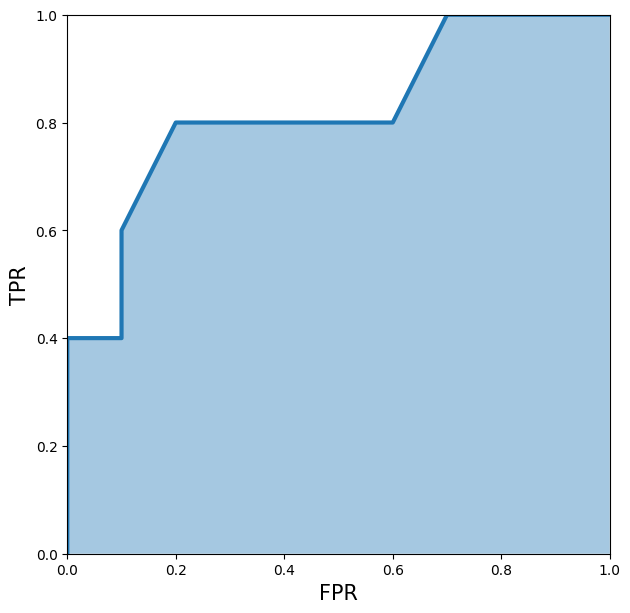

In [121]:
plt.figure(figsize=(7,7))
plt.fill_between(fpr_list,tpr_list,alpha=0.4)
plt.plot(fpr_list,tpr_list,lw=3)
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.xlabel('FPR',fontsize=15)
plt.ylabel('TPR',fontsize=15)
plt.show()

#### THIS CURVE IS KNOWN AS ROC-RECIEVER OPERATING CHARACTERISTIC
#### IF WE CALCULATE THE AREA UNDER THIS ROC WE GET - AREA UNDER ROC CURVE or AREA UNDER CURVE or just simply AUC.

In [123]:
metrics.roc_auc_score(y_true,y_pred)

0.8300000000000001